## 🛒 Sales Forecasting Dashboard using Superstore Dataset

## 📌 Problem Statement
Build a forecasting model and an interactive dashboard to **predict future sales trends** for a retail business, using historical data from the Superstore dataset.

The goal is to help the business plan inventory, optimize marketing strategies, and understand seasonality by forecasting expected sales over the next several months.

---

## 🎯 Objectives
- Predict total future sales using historical daily data.
- Visualize:
  - Forecast vs. actual sales
  - Trend and seasonality components
  - Breakdown by product category or region
- Build an interactive Power BI dashboard to present insights.

---

## 🧰 Tools & Technologies
- Python: `pandas`, `prophet`, `matplotlib`, `seaborn`
- Power BI for visualization and dashboarding

---

## 📦 Dataset
- **Superstore Sales Dataset**  
- Contains order-level data: `Order Date`, `Sales`, `Profit`, `Category`, `Sub-Category`, `Region`, etc.

---

## 🔮 Target Variable
- `Sales` (daily sales revenue to be predicted)

---


## Import the necessary libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 1. Knowing the Dataset

#### 📌 Note on loading data

While loading the CSV file, we got a `UnicodeDecodeError` because the file isn’t saved in UTF-8 encoding (common when exported from Excel).  

To fix this, we used:
```python
dataset = pd.read_csv("superstore_sales.csv", encoding='latin1')
```
Using encoding='latin1' allows Pandas to read special characters correctly and load the dataset without errors.

In [30]:
dataset = pd.read_csv("superstore_sales.csv", encoding='latin1')

#### 🧹 Data overview & quality check

After loading the dataset, we performed some basic checks:

- **Shape of dataset:** `9994 rows × 21 columns`
- **Missing values:** No null values found in any column
- **Duplicate rows:** No duplicates detected (`dataset.duplicated().sum() == 0`)

The dataset looks clean and ready for exploration.


In [31]:
dataset.shape

(9994, 21)

In [32]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [33]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

#### Understanding Variables and Dataset First Look

In [34]:
dataset.columns.to_flat_index()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
# First look at the data
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### 📦 Dataset variable description


The dataset contains the following features:


🏷️ **Categorical features**

| Variable         | Description |
|------------------|-------------|
| **Order ID**     | Unique identifier for each customer order |
| **Ship Mode**    | Shipping method (e.g., Standard Class, Second Class) |
| **Customer ID**  | Unique customer identifier |
| **Customer Name**| Name of the customer |
| **Segment**      | Customer segment (Consumer, Corporate, Home Office) |
| **Country**      | Country (dataset only includes "United States") |
| **City**         | City of the customer |
| **State**        | State of the customer |
| **Postal Code**  | Postal/ZIP code |
| **Region**       | Region (East, West, Central, South) |
| **Product ID**   | Unique identifier for each product |
| **Category**     | High-level product category (Furniture, Office Supplies, Technology) |
| **Sub-Category** | More specific product sub-category |
| **Product Name** | Name of the product |


📅 **Date features**

| Variable       | Description |
|----------------|-------------|
| **Order Date** | Date when the order was placed |
| **Ship Date**  | Date when the order was shipped |


🔢 **Numerical features**

| Variable    | Description |
|------------|-------------|
| **Sales**   | Revenue generated from the sale (target variable for forecasting) |
| **Quantity**| Number of units sold |
| **Discount**| Discount applied (e.g., 0.2 means 20% discount) |
| **Profit**  | Profit earned from the sale |


🛠 **Other / Index**

| Variable | Description |
|--------|-------------|
| **Row ID** | Internal row number / index |


#### Checking Unique value for each variable

In [36]:
print(dataset.nunique().sort_values(ascending=False))

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1850
Ship Date        1334
Order Date       1237
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Ship Mode           4
Region              4
Segment             3
Category            3
Country             1
dtype: int64


## 2. Data Wrangling

#### Standardize column names

To keep our code clean and avoid errors, we:
- Convert all column names to lowercase
- Replace spaces and hyphens with underscores
- Remove extra whitespace

This makes column names easier to use in analysis and modeling.


In [37]:
dataset.columns = (
    dataset.columns
    .str.strip()          # remove leading/trailing spaces
    .str.lower()          # make lowercase
    .str.replace(' ', '_')# replace spaces with underscores
    .str.replace('-', '_')# replace hyphens with underscores
)
print(dataset.columns.tolist())

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


#### Before exploring and modeling the data, we do some basic data wrangling to clean and simplify the dataset:
- Remove columns that are irrelevant, have only one unique value, or don't help in forecasting:
  - `Row ID` (internal index)
  - `Country` (only "United States")
  - `Postal Code` (too granular)
  - `Customer Name` and `Product Name` (high cardinality, not useful for aggregate sales forecasting)

This keeps our dataset cleaner and makes further analysis easier.


In [38]:
dataset.drop(['row_id', 'country', 'postal_code', 'customer_name', 'product_name'], axis=1, inplace=True)

#### Convert date columns & create time-based features

To prepare the data for time series forecasting and deeper analysis, we:

- Convert `Order Date` and `Ship Date` columns to datetime format
- Create new time-based columns from `Order Date`:
  - `year` — year of the order
  - `month` — month of the order
  - `week` — week number in the year
  - `day` — day of the month
  - `day of week` — day of the week (0=Monday, 6=Sunday)

These features help us explore trends, seasonality, and patterns over time.


In [39]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
dataset['ship_date'] = pd.to_datetime(dataset['ship_date'])
print("✅ Converted Date variables to datetime variables")

✅ Converted Date variables to datetime variables


In [40]:
dataset['year'] = dataset['order_date'].dt.year
dataset['month'] = dataset['order_date'].dt.month
dataset['week'] = dataset['order_date'].dt.isocalendar().week
dataset['day'] = dataset['order_date'].dt.day
dataset['day of week'] = dataset['order_date'].dt.day_of_week

#### 🔍 Checking and removing duplicate rows

We found 1 fully duplicated row:
- Same `Order ID`, product, sales, and all other details
- Likely caused by accidental duplication during export or merge

Since it doesn't add information, we removed it using:
```python
dataset.drop_duplicates(inplace=True)


In [41]:
dataset.duplicated().sum()

np.int64(1)

In [42]:
duplicates = dataset[dataset.duplicated(keep=False)]
print(duplicates)

            order_id order_date  ship_date       ship_mode customer_id  \
3405  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   
3406  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   

          segment      city state region       product_id  ... sub_category  \
3405  Home Office  Columbus  Ohio   East  FUR-CH-10002965  ...       Chairs   
3406  Home Office  Columbus  Ohio   East  FUR-CH-10002965  ...       Chairs   

        sales  quantity  discount   profit  year  month  week  day  \
3405  281.372         2       0.3 -12.0588  2014      4    17   23   
3406  281.372         2       0.3 -12.0588  2014      4    17   23   

      day of week  
3405            2  
3406            2  

[2 rows x 21 columns]


In [43]:
dataset.drop_duplicates(inplace=True)

In [44]:
dataset.duplicated().sum()

np.int64(0)

#### Aggregating Data
We aggregate total sales by `Order Date` because time series models like Prophet require:
- One row per time point (e.g., per day)
- A single target value per date (total daily sales)

This transforms our raw transactional data into a clean daily time series for forecasting.

#### Why do we rename columns to `ds` and `y`?

Prophet requires the input DataFrame to have:
- `ds`: the datetime column
- `y`: the numeric target variable

By renaming `Order Date` → `ds` and `Sales` → `y`, we prepare the dataset for modeling.


In [45]:
daily_sales = dataset.groupby('order_date')['sales'].sum().reset_index()
daily_sales.rename(columns={'order_date': 'ds', 'sales': 'y'}, inplace=True)

## 3. Exploratory Data Analysis (EDA)

To better understand the data and find useful patterns, we explore:
- Correlations between numerical features
- Distribution of sales and profit
- Total sales by category, sub-category, region, and segment
- Sales trend over time

These insights guide our feature selection and forecasting.

#### Correlation Heatmap

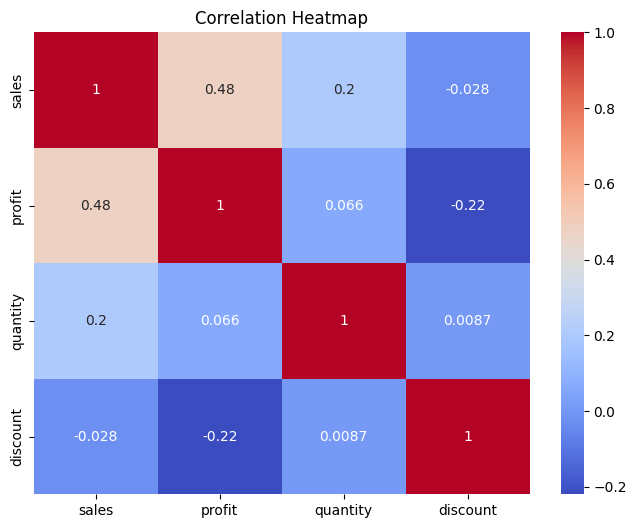

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset[['sales', 'profit', 'quantity', 'discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows that:
- `Sales` and `Profit` have a moderate positive correlation (~0.48)
- `Discount` has a negative correlation with `Profit` (-0.22), suggesting that higher discounts may reduce profit
- `Quantity` has a weak correlation with both `Sales` and `Profit`

This helps us understand which numerical variables might influence each other.

#### Distribution of Sales and Profit

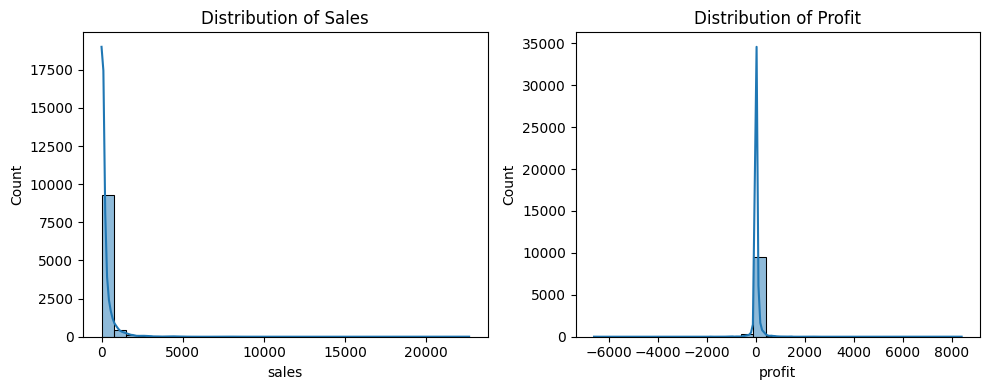

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['sales'], kde=True, bins=30)
plt.title('Distribution of Sales')

plt.subplot(1,2,2)
sns.histplot(dataset['profit'], kde=True, bins=30)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

Both `Sales` and `Profit` distributions are highly right-skewed:
- Most transactions have low sales and profit values
- A few orders have very high values, creating long tails

This suggests there are some large orders or outliers that could impact forecasting.

#### Total Sales by Category and Sub Category

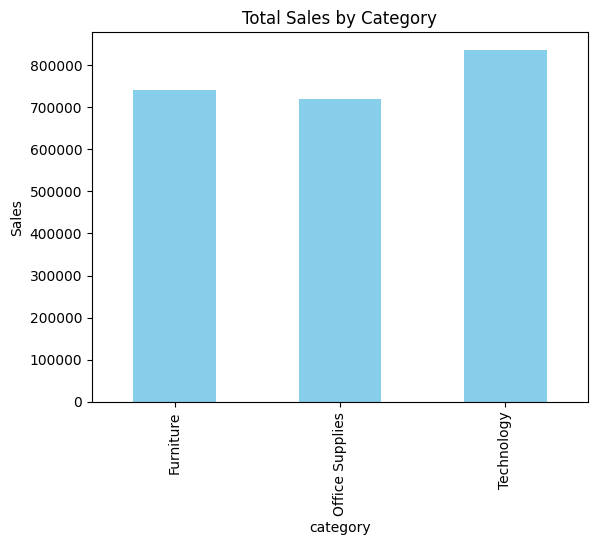

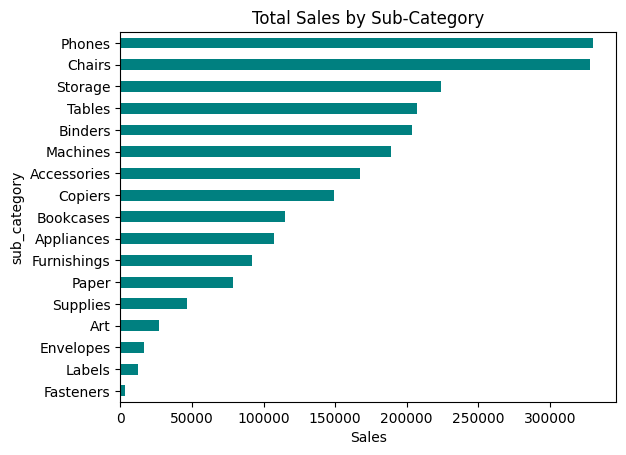

In [48]:
dataset.groupby('category')['sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

dataset.groupby('sub_category')['sales'].sum().sort_values().plot(kind='barh', color='teal')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sales')
plt.show()

The bar chart shows that:
- The Technology category generates the highest sales
- Followed by Furniture and then Office Supplies, which have similar sales levels

This highlights Technology as the most revenue-generating category for the business.

The horizontal bar chart shows significant differences within sub-categories:
- Phones and Chairs have the highest total sales
- Followed by Storage, Tables, and Binders
- Smaller categories like Fasteners, Labels, and Envelopes have very low sales

This suggests that sales are heavily concentrated in a few high-performing sub-categories.

#### Total Sales by Region and Segment

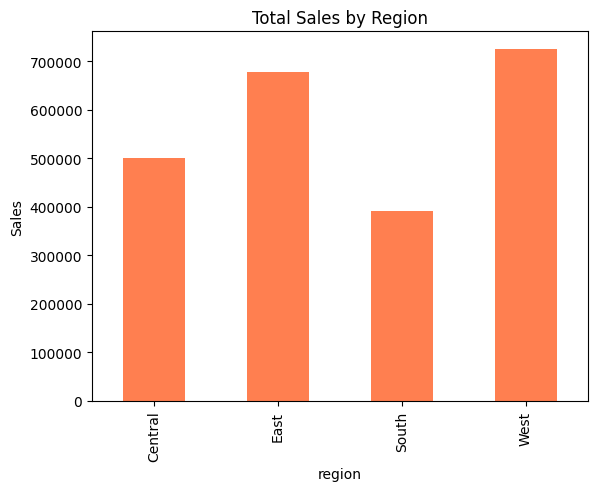

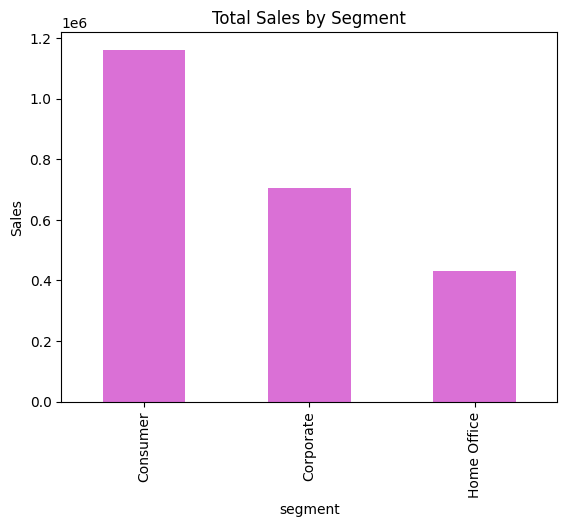

In [49]:
dataset.groupby('region')['sales'].sum().plot(kind='bar', color='coral')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.show()

dataset.groupby('segment')['sales'].sum().plot(kind='bar', color='orchid')
plt.title('Total Sales by Segment')
plt.ylabel('Sales')
plt.show()

Sales vary significantly by region:
- West and East regions generate the highest sales
- Central and South regions have noticeably lower total sales

This could reflect differences in market size, demand, or sales strategy.

The Consumer segment has the highest total sales,
followed by Corporate, and then Home Office.

This shows that consumers are the largest customer base in terms of revenue.

#### Daily Sales Over Time

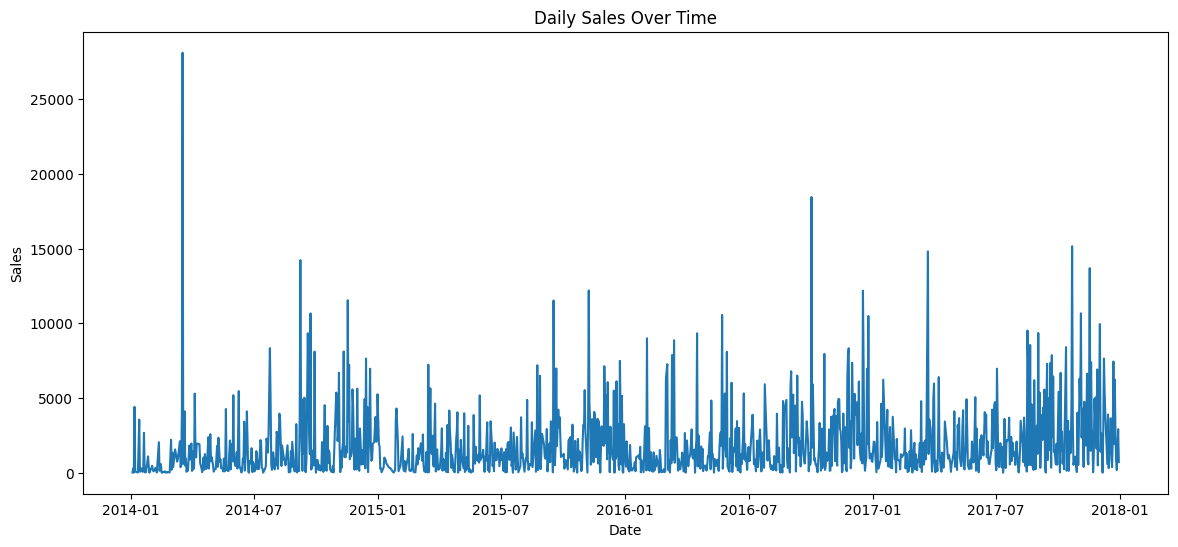

In [50]:
daily_sales = dataset.groupby('order_date')['sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(daily_sales['order_date'], daily_sales['sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Daily sales show high variability and several spikes over time.
Despite fluctuations, there appears to be an overall upward trend,
with some seasonal peaks that may relate to promotions or holidays.

This pattern justifies using time series forecasting to better understand trends and seasonality.

## 4. Handling Outliers

From the distribution plots, we observe significant outliers in both `sales` and `profit`.
These rare, extremely high values can distort forecasting models and reduce prediction accuracy.

As part of data preprocessing, we'll explore handling outliers by:
- Visualizing them again in boxplots
- We'll handle outliers using the Interquartile Range (IQR) method to create a more stable time series dataset.

The goal is to create a more robust time series dataset for forecasting.

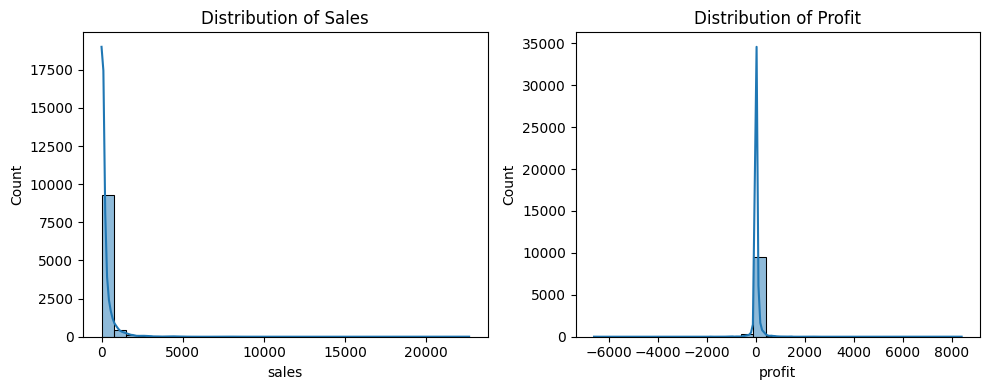

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['sales'], kde=True, bins=30)
plt.title('Distribution of Sales')

plt.subplot(1,2,2)
sns.histplot(dataset['profit'], kde=True, bins=30)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

Although there are some very high sales values, they reflect real large orders or seasonal spikes.
Since our goal is to forecast actual sales trends, we keep these outliers in the target variable (`sales`).
Instead, we focus on handling outliers in other numerical features namely `profit`.

In [52]:
Q1 = dataset['profit'].quantile(0.25)
Q3 = dataset['profit'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

dataset['profit'] = np.where(dataset['profit'] > upper_bound, upper_bound, dataset['profit'])

Handling Outliers in Profit

Negative profits are valid as they represent real losses,  
but extremely high profits may distort our analysis.

We used the Interquartile Range (IQR) method to cap profits above the calculated upper bound, while keeping other values unchanged.


## 5. Model Training

16:39:41 - cmdstanpy - INFO - Chain [1] start processing
16:39:41 - cmdstanpy - INFO - Chain [1] done processing


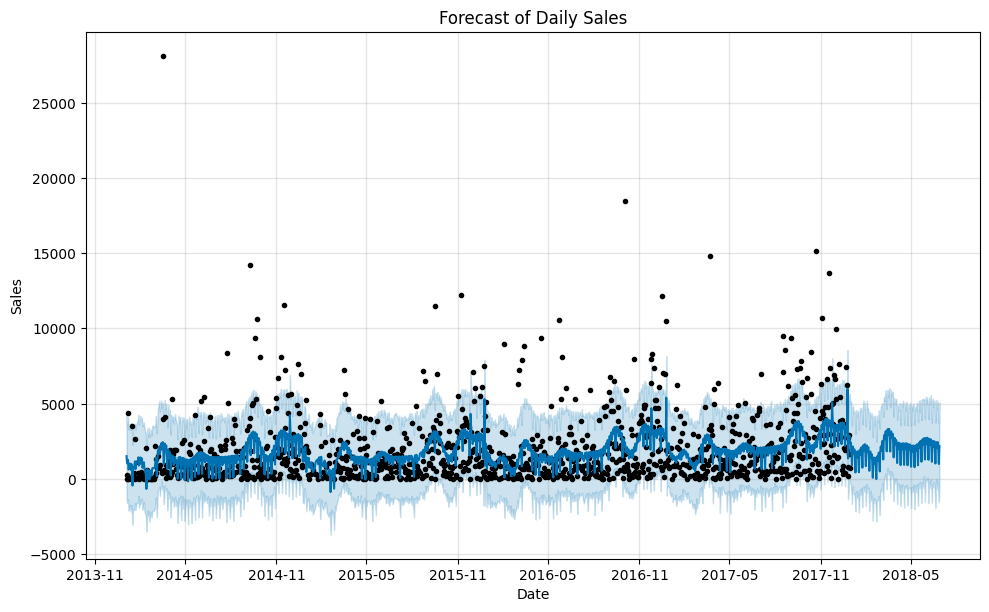

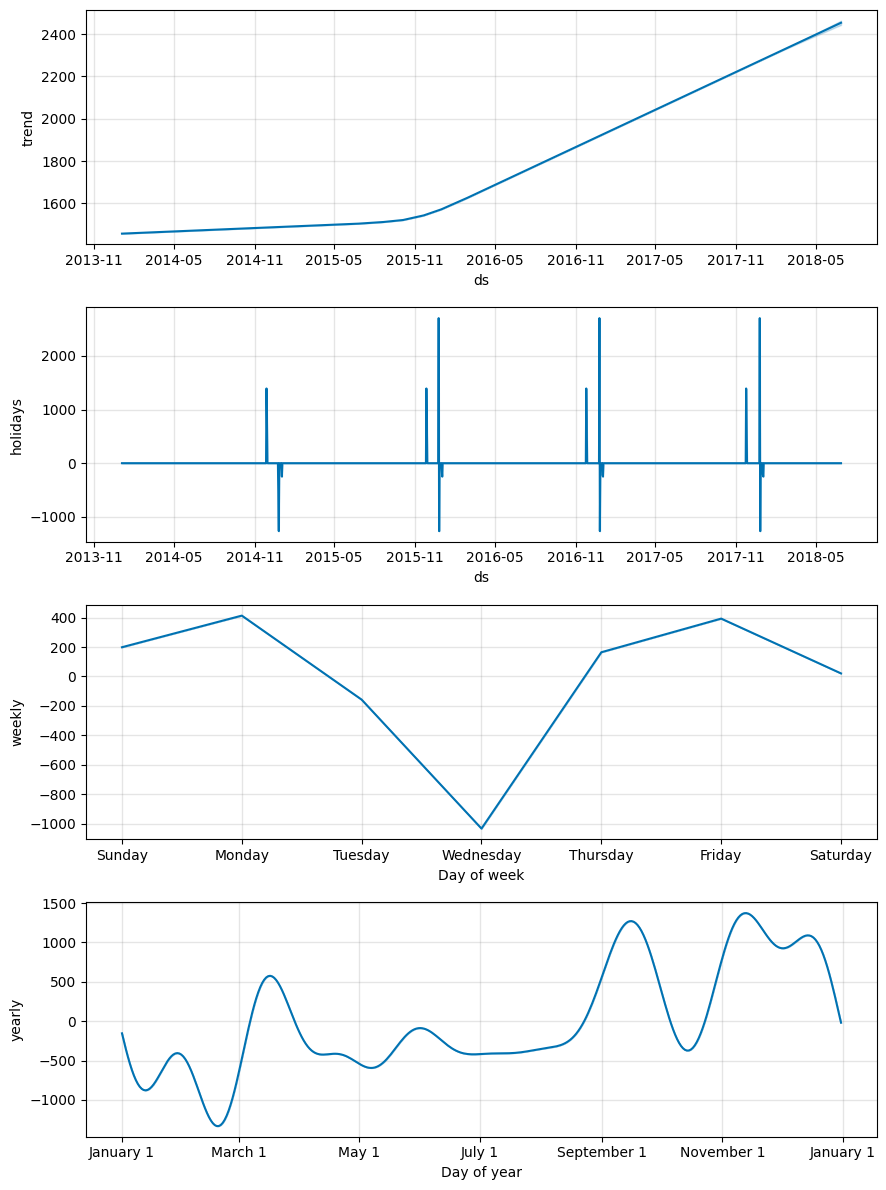

In [53]:
from prophet import Prophet

daily_sales = daily_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})
holidays = pd.DataFrame({
    'holiday': ['Black Friday']*4 + ['Christmas']*4 + ['New Year']*4,
    'ds': pd.to_datetime([
        '2014-11-28', '2015-11-27', '2016-11-25', '2017-11-24',
        '2014-12-25', '2015-12-25', '2016-12-25', '2017-12-25',
        '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'
    ]),
    'lower_window': 0,
    'upper_window': 1
})


model = Prophet(holidays=holidays)
model.fit(daily_sales)

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

## 6. Model Evaluation

To evaluate the forecasting performance, we used Prophet's built-in cross-validation method
with a horizon of 9–13 days and computed standard metrics:

- **MAPE (Mean Absolute Percentage Error):** ~7–8% → indicates the average forecast error relative to actual sales.
- **RMSE / MAE:** show stable and reasonable absolute errors.
- **Coverage:** ~88–90% → the proportion of actual sales within the forecast's uncertainty intervals.

These results suggest the model captures the main sales trends reasonably well, providing a reliable forecast for the business.


  0%|          | 0/4 [00:00<?, ?it/s]16:41:07 - cmdstanpy - INFO - Chain [1] start processing
16:41:07 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:01,  2.88it/s]16:41:07 - cmdstanpy - INFO - Chain [1] start processing
16:41:07 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00,  2.63it/s]16:41:08 - cmdstanpy - INFO - Chain [1] start processing
16:41:08 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:01<00:00,  2.60it/s]16:41:08 - cmdstanpy - INFO - Chain [1] start processing
16:41:08 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:01<00:00,  2.58it/s]
c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\

  horizon           mse         rmse          mae      mape     mdape  \
0  9 days  4.482286e+06  2117.141090  1357.367739  7.929306  0.716910   
1 10 days  4.387065e+06  2094.532081  1343.988733  8.071967  0.813157   
2 11 days  4.909456e+06  2215.729249  1473.564860  7.399801  0.700705   
3 12 days  5.991520e+06  2447.758186  1639.581233  5.495845  0.772081   
4 13 days  5.003778e+06  2236.912542  1456.324065  3.612890  0.755876   

      smape  coverage  
0  0.853879  0.885417  
1  0.886055  0.906250  
2  0.899137  0.875000  
3  0.930628  0.859375  
4  0.866885  0.906250  


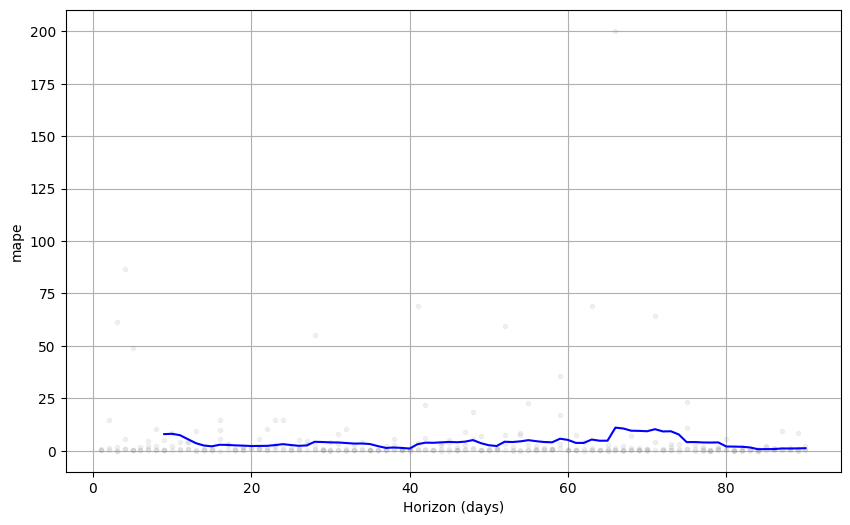

In [56]:
from prophet.diagnostics import cross_validation, performance_metrics
# horizon: how far into the future to forecast each time (e.g., 90 days)
# initial: size of the initial training period (e.g., 730 days ~ 2 years)
# period: spacing between cutoff dates

df_cv = cross_validation(model, 
                         initial='730 days', 
                         period='180 days', 
                         horizon = '90 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()


## 7. Exporting Dataset

In [59]:
# Get the last date from your original data
last_date = daily_sales['ds'].max()

# Filter only future forecasted dates
future_forecast = forecast[forecast['ds'] > last_date]

In [60]:
# Export future forecast to CSV
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_sales.csv', index=False)

print("Forecast exported to forecasted_sales.csv")

Forecast exported to forecasted_sales.csv


In [61]:
# Export historical daily sales data to CSV
daily_sales.to_csv('daily_sales.csv', index=False)

print("Historical daily sales exported to daily_sales.csv")

Historical daily sales exported to daily_sales.csv
